# Import software libraries

In [1]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import scipy as sp                                          # Apply advanced mathematical functions.
from scipy import stats
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce                              # Encode data.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- Category Encoders {}'.format(ce.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.19.2
- pandas 1.1.3
- SciPy 1.5.2
- Matplotlib 3.3.2
- Seaborn 0.11.0
- scikit-learn 0.23.2
- Category Encoders 2.2.2


# Load and preview the data

In [2]:

users_data = pd.read_pickle('data/users_data_cleaned.pickle')
users_data.head(3)


,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile


# Check the shape of the data

In [3]:
users_data.shape

(45209, 19)

# Check the number of unique users

In [4]:
users_data.user_id.nunique()

45209

# Check the data types

In [5]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [6]:
users_data.columns.to_series().groupby(users_data.dtypes).groups

{bool: ['default', 'housing', 'loan', 'term_deposit'], int64: ['age', 'duration', 'campaign', 'pdays', 'previous'], float64: ['number_transactions', 'total_amount_usd'], datetime64[ns]: ['date_joined'], object: ['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']}

# Check for correlations

In [7]:
users_data.corr()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


# Generate summary statistics for all of the data

In [8]:
users_data.describe(datetime_is_numeric = True ,include='all')

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
count,45209,35210.000000,35210.000000,45209.000000,44921,45209,43352,45209,45209,45209,32191,45209.000000,45209.000000,45209.000000,45209.000000,8252,45209,45179,45115
unique,45209,NaN,NaN,NaN,11,3,3,2,2,2,2,NaN,NaN,NaN,NaN,3,2,NaN,3
top,2275bd00-9e51-49a9-bfc8-22d5addac43a,NaN,NaN,NaN,blue-collar,married,secondary,False,True,False,cellular,NaN,NaN,NaN,NaN,failure,False,NaN,mobile
freq,1,NaN,NaN,NaN,9731,27212,23202,44394,25128,37965,29285,NaN,NaN,NaN,NaN,4901,39920,NaN,27504
mean,NaN,3.977052,1369.417751,40.935853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.153067,2.763897,40.199651,0.580349,NaN,NaN,1999-06-14 21:54:38.558619008,NaN
min,NaN,1.000000,-8019.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,1988-01-01 00:00:00,NaN
25%,NaN,2.000000,73.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,1993-09-18 00:00:00,NaN
50%,NaN,3.000000,451.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,1999-06-11 00:00:00,NaN
75%,NaN,4.000000,1438.000000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,2005-03-18 00:00:00,NaN
max,NaN,20.000000,102127.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4918.000000,63.000000,871.000000,275.000000,NaN,NaN,2010-11-30 00:00:00,NaN


# Generate summary statistics for numerical data only

In [9]:
users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


# Generate modal values for all data

In [10]:
# Drop user ID since it's unique.

users_data.drop('user_id', axis=1).mode()

,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,2.0,0.0,32.0,blue-collar,married,secondary,False,True,False,cellular,124.0,1.0,-1.0,0.0,failure,False,1990-07-05,mobile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-12-07,NaN


# Generate skewness and kurtosis measurements

In [11]:
users_data.skew()

number_transactions     2.704543
total_amount_usd        8.596128
age                     0.684861
default                 7.245206
housing                -0.224686
loan                    1.852545
duration                3.144556
campaign                4.898555
pdays                   2.615635
previous               41.845672
term_deposit            2.383403
dtype: float64

In [12]:
users_data.kurt()

number_transactions       6.659034
total_amount_usd        150.790967
age                       0.319760
default                  50.495241
housing                  -1.949602
loan                      1.431987
duration                 18.155941
campaign                 39.248145
pdays                     6.934713
previous               4506.684640
term_deposit              3.680770
dtype: float64

# Plot histograms for all numerical columns

In [13]:
users_data_hist = users_data.select_dtypes(exclude='bool')


array([[<AxesSubplot:title={'center':'number_transactions'}>,
        <AxesSubplot:title={'center':'total_amount_usd'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

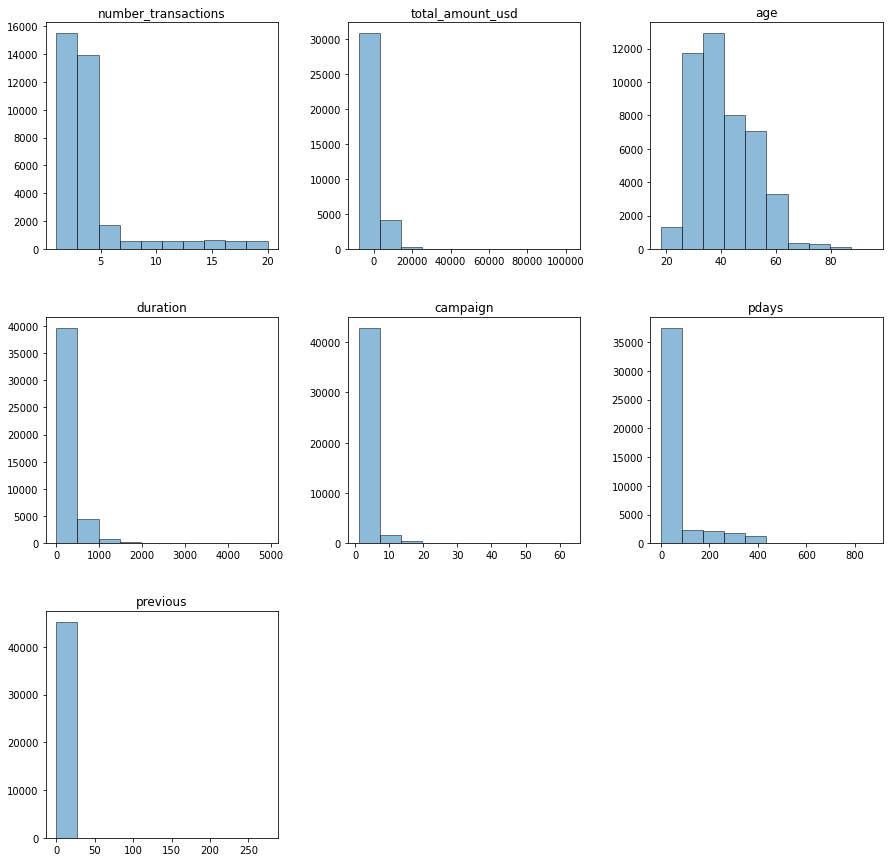

In [14]:
users_data_hist.hist(figsize=(15,15),alpha=0.5, edgecolor='black', grid=False)


# Generate a box plot for `age`

In [15]:
users_data.age.describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

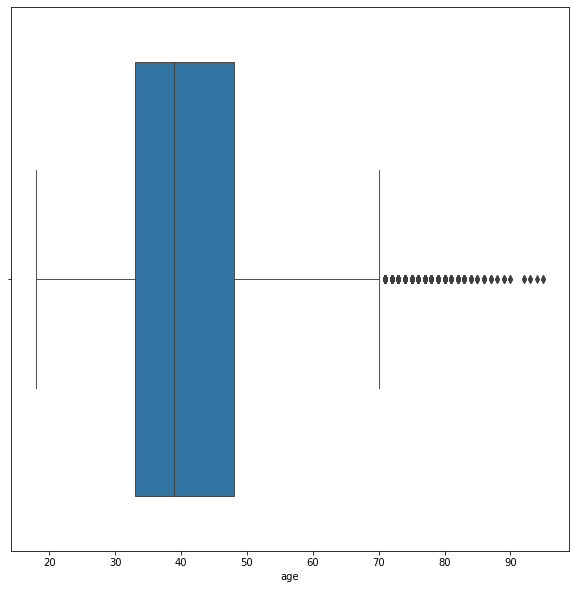

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x = users_data['age'], linewidth = 0.9)


# Generate a violin plot for `age`

<AxesSubplot:xlabel='age'>

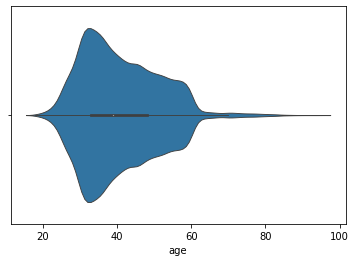

In [17]:
sns.violinplot(x = users_data['age'], linewidth=0.9)

# Generate a box plot for `number_transactions`

In [18]:
users_data.number_transactions.describe()

count    35210.000000
mean         3.977052
std          3.814329
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: number_transactions, dtype: float64

<AxesSubplot:xlabel='number_transactions'>

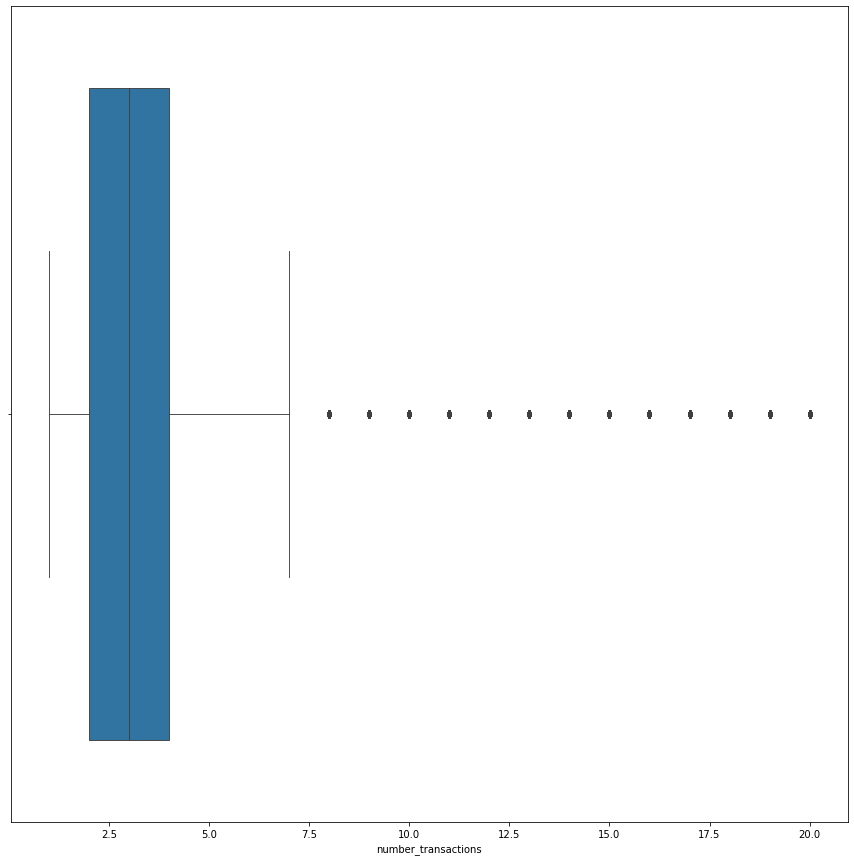

In [19]:
plt.figure(figsize=(15,15))
sns.boxplot(x=users_data['number_transactions'], linewidth=0.9)



# Generate a violin plot for `number_transactions`

<AxesSubplot:xlabel='number_transactions'>

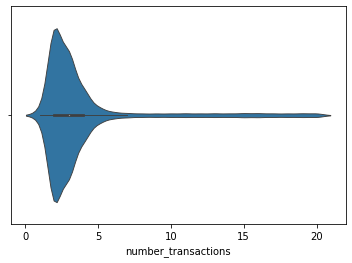

In [20]:

sns.violinplot(x = users_data['number_transactions'], linewidth = 0.9)

# Generate scatter plots comparing `total_amount_usd` to `number_transactions`

<AxesSubplot:xlabel='total_amount_usd', ylabel='number_transactions'>

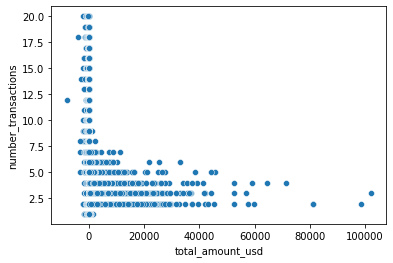

In [21]:

sns.scatterplot(data=users_data, y = 'number_transactions', x = 'total_amount_usd')

<AxesSubplot:xlabel='total_amount_usd', ylabel='number_transactions'>

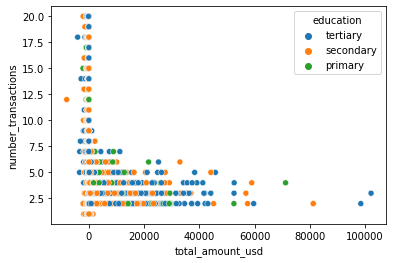

In [22]:
sns.scatterplot(data=users_data, y = 'number_transactions', x = 'total_amount_usd', hue='education')


# Generate a line plot for `total_amount_usd`

<AxesSubplot:xlabel='date_joined', ylabel='total_amount_usd'>

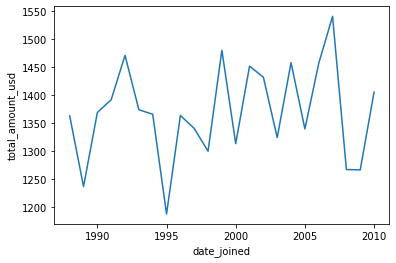

In [23]:
years = users_data['date_joined'].dt.year



sns.lineplot(data=users_data, x=years, y ='total_amount_usd', estimator=np.mean)


# Generate bar charts for `job`

In [24]:

users_job_dist = users_data['job'].value_counts(dropna=False)
users_job_dist


blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

Text(0.5, 1.0, 'Distribution of Jobs')

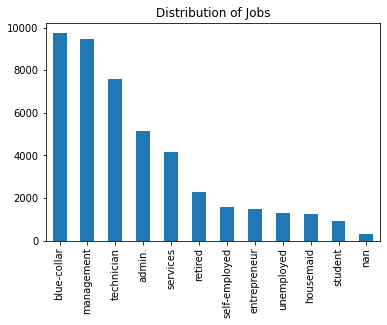

In [25]:
# Vertical bar chart.

users_job_dist.plot(kind='bar')
plt.title('Distribution of Jobs')


Text(0.5, 1.0, 'Distribution of Jobs')

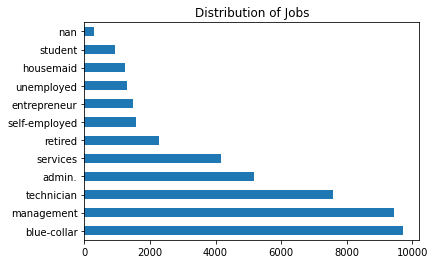

In [26]:
# Horizontal bar chart

users_job_dist.plot(kind='barh')
plt.title('Distribution of Jobs')


<AxesSubplot:>

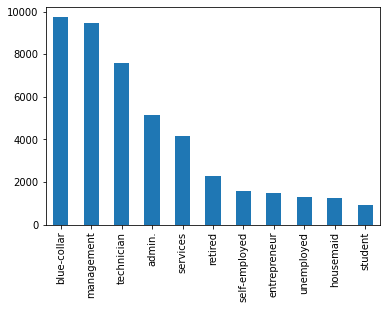

In [27]:
# Exclude missing values.

users_data['job'].value_counts().plot(kind='bar')

# Generate a bar chart for `marital`

In [28]:


users_marital_dist = users_data['marital'].value_counts(dropna=False)
users_marital_dist



married     27212
single      12790
divorced     5207
Name: marital, dtype: int64

<AxesSubplot:>

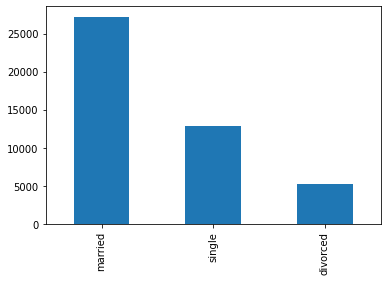

In [29]:

users_marital_dist.plot(kind='bar')

# Generate a bar chart for `education`

In [30]:

users_education_dist = users_data['education'].value_counts(dropna=False)
users_education_dist




secondary    23202
tertiary     13300
primary       6850
NaN           1857
Name: education, dtype: int64

<AxesSubplot:>

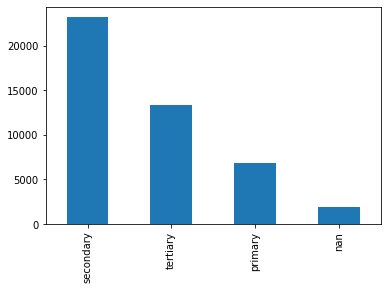

In [31]:
users_education_dist.plot(kind='bar')


# Generate a bar chart for `contact`

In [32]:


users_contact_dist = users_data['contact'].value_counts(dropna=False)
users_contact_dist





cellular     29285
NaN          13018
telephone     2906
Name: contact, dtype: int64

# Generate a bar chart for `poutcome`

<AxesSubplot:>

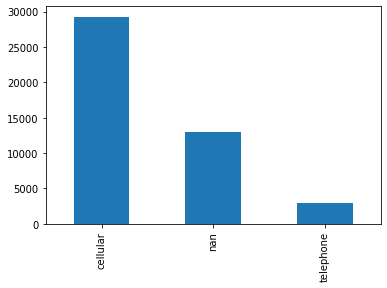

In [33]:


users_contact_dist.plot(kind='bar')



# Generate a bar chart for `default`

In [34]:

users_default_dist = users_data['default'].value_counts(dropna=False)
users_default_dist





False    44394
True       815
Name: default, dtype: int64

<AxesSubplot:>

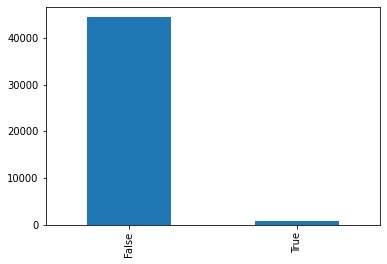

In [35]:
users_default_dist.plot(kind='bar')

# Generate a bar chart for `device`

In [36]:

users_device_dist = users_data['device'].value_counts(dropna=False)
users_device_dist



mobile     27504
desktop    12112
tablet      5499
NaN           94
Name: device, dtype: int64

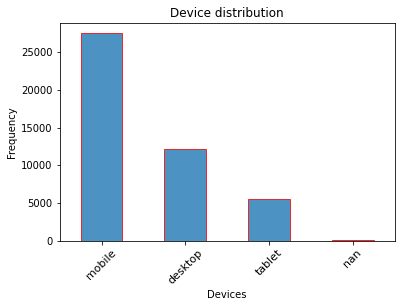

In [37]:

users_device_dist.plot(kind='bar',alpha=0.8, edgecolor='red')
plt.title("Device distribution")
plt.xlabel('Devices')
plt.ylabel('Frequency')
plt.xticks(rotation=45, size=11)

plt.show()






# Generate a heatmap for the feature correlations

In [38]:

corr = users_data.corr()

corr

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


<AxesSubplot:>

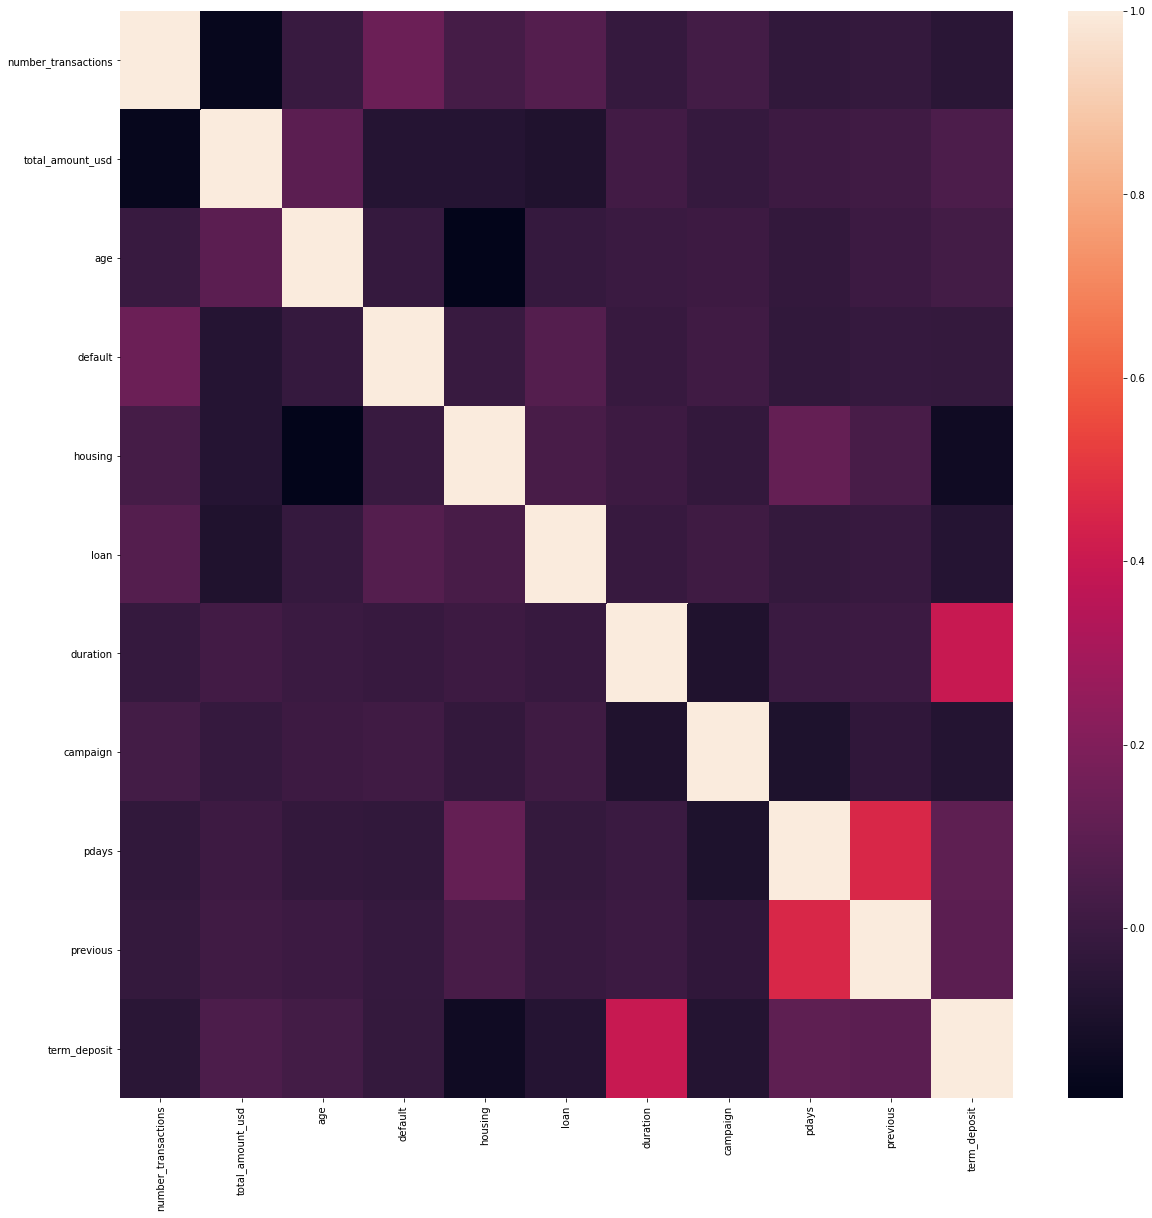

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(corr)



# Format the heatmap to make it easier to read

Text(0.5, 1.0, 'Correlation Heatmap')

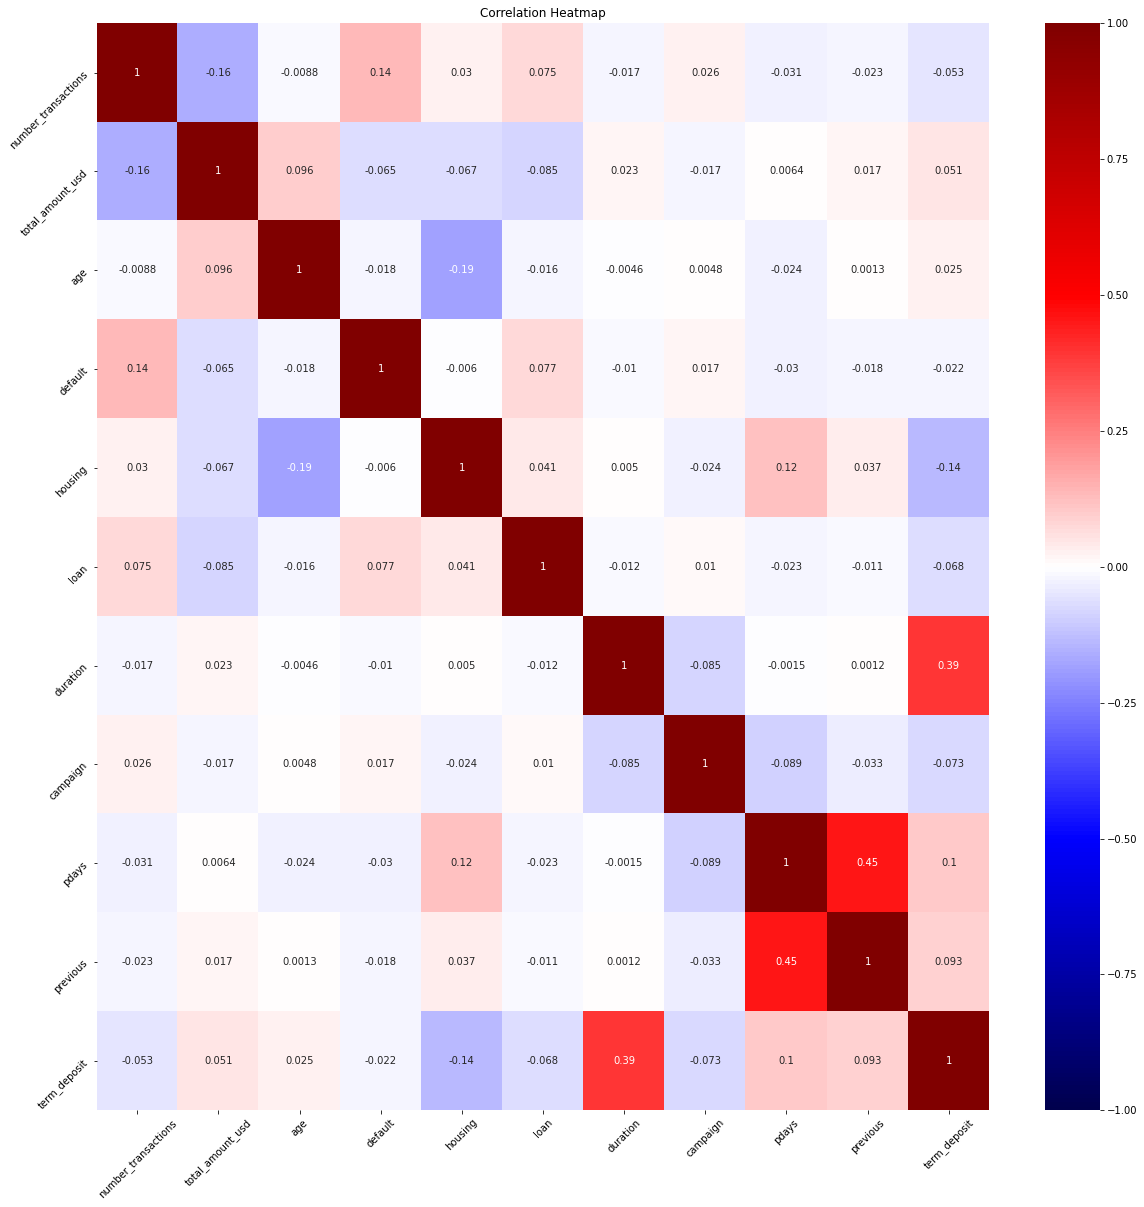

In [40]:

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,cmap='seismic', linecolor='white',cbar=True,vmin=-1, vmax=1)
plt.tick_params(labelsize=10, rotation=45)
plt.title("Correlation Heatmap")

# Identify missing values

In [41]:
users_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

# Identify the percentage of missing values for each feature

In [42]:
percent_missing = users_data.isnull().mean()

percent_missing

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

# Generate a missing value report

In [43]:
def missing_value_pct_df(data):
    """Create a DataFrame to summarize missing values."""
  
    percent_missing = data.isnull().mean() 
    missing_value_df = \
    pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = \
    missing_value_df.rename(columns = {'index': 'column_name',
                                       0: 'percent_missing'})

    # Multiply by 100 and round to 4 decimal places.
    missing_value_df['percent_missing'] = \
    missing_value_df['percent_missing']. \
    apply(lambda x: round(x * 100, 2)) 

    missing_value_df = \
    missing_value_df.sort_values(by = ['percent_missing'],
                                 ascending = False)

    return missing_value_df

In [44]:
missing_value_df = missing_value_pct_df(users_data)
missing_value_df



,column_name,percent_missing
15,poutcome,81.75
10,contact,28.80
2,total_amount_usd,22.12
1,number_transactions,22.12
6,education,4.11
4,job,0.64
18,device,0.21
17,date_joined,0.07
12,campaign,0.00
16,term_deposit,0.00


# Remove features with a high percentage of missing values

In [45]:
# Threshold above which to drop feature.

threshold = 80
col_to_drop = list(missing_value_df[missing_value_df['percent_missing']>threshold]['column_name'])
print('Numbers of features to drop:', missing_value_df[missing_value_df['percent_missing']>threshold].shape[0])
print(f'Features with missing values greater than {threshold} % ', col_to_drop)



Numbers of features to drop: 1
Features with missing values greater than 80 %  ['poutcome']


In [46]:
users_data_cleaned = users_data.drop(col_to_drop, axis=1)

In [47]:
# Confirm feature was dropped.


missing_value_df = missing_value_pct_df(users_data_cleaned)

missing_columns = list(missing_value_df[missing_value_df['percent_missing']>0]['column_name'])
print('Number of features with missing values',len(missing_columns))
#missing_columns






Number of features with missing values 7


# Identify numerical data with missing values

In [48]:

dtypes = ['int64','float64']

numerical_columns = list(users_data_cleaned.select_dtypes(dtypes).columns)

print('Numerical features with missing values', list(set(numerical_columns).intersection(missing_columns)))





Numerical features with missing values ['number_transactions', 'total_amount_usd']


# Impute missing data values for `total_amount_usd`

In [49]:
# Find a sample user with missing value

sample_user = users_data_cleaned[users_data_cleaned['total_amount_usd'].isnull()].sample(1).user_id

sample_user





33316    935c9a35-db85-4fbf-9df2-2acb542b769f
Name: user_id, dtype: object

In [50]:
# Print mean of total_amount_usd.)
print('Mean total amount usd:', round(users_data_cleaned['total_amount_usd'].mean(),2))
mean_val = round(users_data_cleaned['total_amount_usd'].mean(),2)


# Impute missing values for total_amount_usd with mean.

users_data_cleaned['total_amount_usd'].fillna(mean_val,inplace=True)



Mean total amount usd: 1369.42


In [51]:
users_data_cleaned[users_data_cleaned.user_id.isin(sample_user)]['total_amount_usd']


33316    1369.42
Name: total_amount_usd, dtype: float64

# Replace missing values for `number_transactions` with `0`

In [52]:
users_data_cleaned['number_transactions'].fillna(0,inplace=True)


In [53]:
users_data_cleaned[users_data_cleaned.user_id.isin(sample_user)]['number_transactions']


33316    0.0
Name: number_transactions, dtype: float64

# Identify categorical data with missing values

In [54]:
cat_cols = list(users_data_cleaned.select_dtypes(['object']).columns)

print('Categorical features with missing values', list(set(cat_cols).intersection(missing_columns)))





Categorical features with missing values ['education', 'contact', 'device', 'job']


# Replace categorical missing values with `'Unknown'`

In [55]:
users_data_cleaned.device.fillna('Unknown',inplace=True)
users_data_cleaned.education.fillna('Unknown',inplace=True)
users_data_cleaned.contact.fillna('Unknown',inplace=True)
users_data_cleaned.job.fillna('Unknown',inplace=True)




In [56]:
users_data_cleaned.device.value_counts()

mobile     27504
desktop    12112
tablet      5499
Unknown       94
Name: device, dtype: int64

# Check if there are any other missing values

In [57]:
#users_data_cleaned.isnull().sum()

missing_value_df = missing_value_pct_df(users_data_cleaned)
#missing_value_df

missing_columns = list(missing_value_df[missing_value_df['percent_missing']>0]['column_name'])
print('Number of features with missing value', len(missing_columns))
print('Features with missing values', missing_columns)


Number of features with missing value 1
Features with missing values ['date_joined']


# Remove all rows where `date_joined` is missing

In [58]:
print('Number of user with corrupted data:', users_data_cleaned[users_data_cleaned['date_joined'].isnull()].shape[0])



Number of user with corrupted data: 30


In [59]:
# Remove corrupted data.

users_data_cleaned = users_data_cleaned[~users_data_cleaned['date_joined'].isnull()]


In [60]:
# Check to see if any corrupted rows remain.

print('Number of missing values in date joined:', users_data_cleaned[users_data_cleaned['date_joined'].isnull()].shape[0])



Number of missing values in date joined: 0


# Perform one last check for missing values

In [61]:
missing_value_df = missing_value_pct_df(users_data_cleaned)

missing_columns = list(missing_value_df[missing_value_df['percent_missing']>0]['column_name'])

print('Number of features with missing values:', len(missing_columns))







Number of features with missing values: 0


# View the distribution of `age`

Text(0.5, 1.0, 'Distribution of Age')

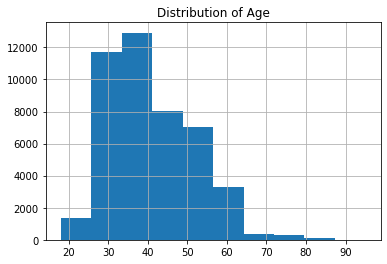

In [62]:
users_data_cleaned['age'].hist()
plt.title('Distribution of Age')

# Apply a log transformation to `age`

Text(0.5, 1.0, 'Log Transformation of Age')

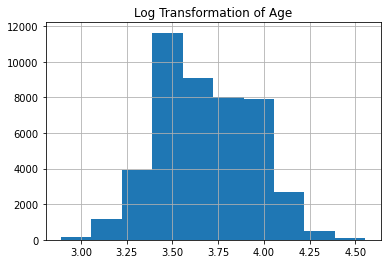

In [75]:
np.log(users_data_cleaned['age']).hist()
plt.title('Log Transformation of Age')


# Apply a Box–Cox transformation to `age`

Text(0.5, 1.0, 'Box-Cox Transformation of Age')

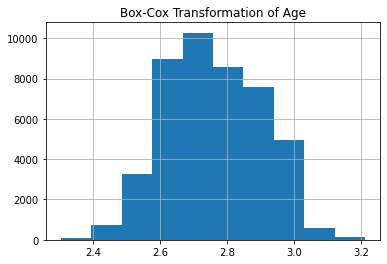

In [78]:

from scipy import stats
pd.Series(stats.boxcox(users_data_cleaned['age'])[0]).hist()
plt.title('Box-Cox Transformation of Age')

# Identify categorical features

In [84]:
cat_feat = list(users_data_cleaned.select_dtypes(['object']).columns)

print('Number of categorical features', len(cat_feat))
print('Names of categorical features', cat_feat)







Number of categorical features 6
Names of categorical features ['user_id', 'job', 'marital', 'education', 'contact', 'device']


# One-hot encode `job`

In [86]:
#users_data_cleaned.head(5)

In [88]:
users_data_cleaned['job'].value_counts(dropna=True)

blue-collar      9725
management       9453
technician       7592
admin.           5168
services         4152
retired          2262
self-employed    1577
entrepreneur     1485
unemployed       1301
housemaid        1239
student           937
Unknown           288
Name: job, dtype: int64

In [90]:
# Create object for one-hot encoding.
ohe = ce.OneHotEncoder(cols='job', return_df=True, use_cat_names=True)




In [91]:
# Fit and transform data.
users_data_encoded = ohe.fit_transform(users_data_cleaned)


# Preview the data.
users_data_encoded.head()


,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,True,False,Unknown,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,True,False,Unknown,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,True,True,Unknown,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,True,False,Unknown,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,False,False,Unknown,198,1,-1,0,False,1995-08-01,mobile


In [92]:
list(users_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device']

In [93]:


print('Shape of daata before encoding:', users_data_cleaned.shape)
print('Shape of daata after encoding:', users_data_encoded.shape)

Shape of daata before encoding: (45179, 18)
Shape of daata after encoding: (45179, 29)


# Dummy encode `marital`

In [95]:
#users_data_encoded.marital.value_counts()

marital_encoded = pd.get_dummies(data=users_data_encoded['marital'], drop_first=True)

marital_encoded



,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
45211,1,0
45212,0,0
45213,1,0
45214,1,0


In [97]:
# Conncatenate the new encoded columns.

users_data_encoded = pd.concat([users_data_encoded,marital_encoded], axis=1)



# Drop the original variable.
users_data_encoded.drop(['marital'], axis=1, inplace=True)


# Preview the data
users_data_encoded.head()


,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device,married,single
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,Unknown,261,1,-1,0,False,1998-08-23,mobile,1,0
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,Unknown,151,1,-1,0,False,2008-07-15,desktop,0,1
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,Unknown,76,1,-1,0,False,2002-06-04,mobile,1,0
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,Unknown,92,1,-1,0,False,1995-06-29,tablet,1,0
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,Unknown,198,1,-1,0,False,1995-08-01,mobile,0,1


In [98]:


print("Shape of the data after encoding:", users_data_encoded.shape)
list(users_data_encoded)


Shape of the data after encoding: (45179, 30)


['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device',
 'married',
 'single']

# One-hot encode the remaining categorical variables

In [101]:
cols = ['education','contact','device']

ohe = ce.OneHotEncoder(cols=cols, return_df=True, use_cat_names=True)




In [102]:
# Fit and transform data.
users_data_encoded = ohe.fit_transform(users_data_encoded)


# Preview the data.

users_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,pdays,previous,term_deposit,date_joined,device_mobile,device_desktop,device_tablet,device_Unknown,married,single
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,-1,0,False,1998-08-23,1,0,0,0,1,0
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,-1,0,False,2008-07-15,0,1,0,0,0,1
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,-1,0,False,2002-06-04,1,0,0,0,1,0
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,-1,0,False,1995-06-29,0,0,1,0,1,0
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,-1,0,False,1995-08-01,1,0,0,0,0,1


In [103]:

print("Shape of the data after encoding:", users_data_encoded.shape)
list(users_data_encoded)



Shape of the data after encoding: (45179, 38)


['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single']

# Discretize `age` into bins

In [104]:
users_data_encoded.age.describe()

count    45179.000000
mean        40.935103
std         10.618499
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [105]:
# Define age bins and labels.

bins = [18, 25, 35, 45, 55, 65, 75, 110]
labels = ['18–24', '25–34', '35–44',
          '45–54', '55–64', '65–74', '75+']

# Perform binning using bin list.
users_data_encoded['age_group'] = pd.cut(users_data_encoded['age'], bins=bins,labels=labels, right=False)




# Map bins to integer values.
users_data_encoded['age_group_encoded'] = users_data_encoded['age_group'].cat.codes

In [107]:
# Verify correct binning.

age_vars = ['age_group_encoded','age_group','age']

users_data_encoded[age_vars].sample(10)



,age_group_encoded,age_group,age
41520,5,65–74,71
41187,1,25–34,28
24187,4,55–64,57
18362,3,45–54,49
31079,5,65–74,71
8028,2,35–44,35
15203,1,25–34,29
38899,2,35–44,35
43398,6,75+,84
16306,3,45–54,47


# Plot the new distribution of `age`

In [109]:

users_age_dist = users_data_encoded.age_group.value_counts()
users_age_dist

35–44    14524
25–34    14194
45–54     9951
55–64     4892
18–24      809
65–74      510
75+        299
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Distribution of Age Category')

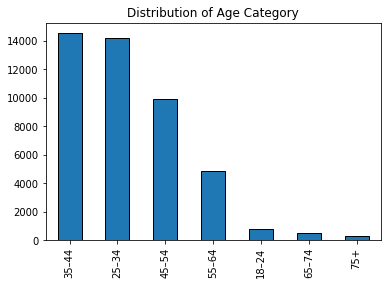

In [110]:
users_age_dist.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Age Category')


<AxesSubplot:>

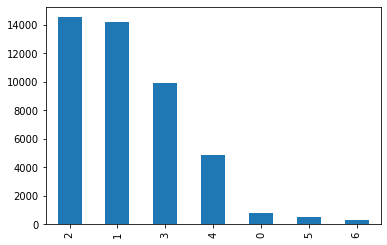

In [111]:
# Check against encoded values.

users_data_encoded.age_group_encoded.value_counts().plot(kind='bar')


# Drop the `age` and `age_group` variables

In [112]:

users_data_encoded.drop(['age','age_group'], axis=1, inplace=True)

list(users_data_encoded)



['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single',
 'age_group_encoded']

# Create a `month_joined` variable from `date_joined`

In [113]:

users_data_encoded['month_joined'] = users_data_encoded['date_joined'].dt.month

Text(0.5, 1.0, 'Distribution of MOnth the users joined')

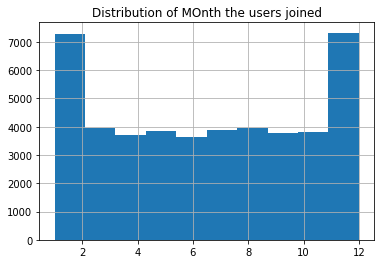

In [114]:
# View the distribution of data.

users_data_encoded['month_joined'].hist()
plt.title("Distribution of MOnth the users joined")


In [115]:

users_data_encoded.drop(['date_joined'], axis=1, inplace=True)
list(users_data_encoded)



['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single',
 'age_group_encoded',
 'month_joined']

# Remove features with low variance

In [116]:
users_data_encoded.std()

number_transactions       3.749994
total_amount_usd       2704.291321
job_management            0.406767
job_technician            0.373908
job_entrepreneur          0.178296
job_blue-collar           0.411004
job_Unknown               0.079587
job_retired               0.218087
job_admin.                0.318287
job_services              0.288889
job_self-employed         0.183543
job_unemployed            0.167236
job_housemaid             0.163318
job_student               0.142513
education_tertiary        0.455691
education_secondary       0.499832
education_Unknown         0.198480
education_primary         0.358591
default                   0.133095
housing                   0.496878
loan                      0.366802
contact_Unknown           0.452851
contact_cellular          0.477695
contact_telephone         0.245250
duration                257.281109
campaign                  3.097836
pdays                   100.134967
previous                  2.303009
term_deposit        

In [117]:
# Define standard deviation threshold.

threshold =0.1

# Identify features below threshold.
cols_to_drop = list(users_data_encoded.std()[users_data_encoded.std()<threshold].index.values)

print('Features with low std', cols_to_drop)







Features with low std ['job_Unknown', 'device_Unknown']


In [118]:
# Drop features below threshold.
users_data_interim = users_data_encoded.drop(cols_to_drop, axis=1)

list(users_data_interim)





['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'married',
 'single',
 'age_group_encoded',
 'month_joined']

# Drop highly correlated features

In [122]:
# Define correlation threshold.


threshold = 0.75

corr_matrix = users_data_encoded.corr().abs()

high_corr_var = np.where(corr_matrix>=threshold)

high_corr_var = [(corr_matrix.index[x],corr_matrix.columns[y],
                  round(corr_matrix.iloc[x,y],2))
                 for x,y in zip(*high_corr_var)
                 if x!=y and x<y
                ]


high_corr_var








[('contact_Unknown', 'contact_cellular', 0.86),
 ('device_mobile', 'device_desktop', 0.75),
 ('married', 'single', 0.77)]

In [123]:
# Tidy up the output.

record_collinear = pd.DataFrame(high_corr_var).rename(columns={
    0:'drop_feature',
    1:'corr_feature',
    2:'corr_values'
})

record_collinear = record_collinear.sort_values(by='corr_values', ascending=False)

record_collinear = record_collinear.reset_index(drop=True)

record_collinear










,drop_feature,corr_feature,corr_values
0,contact_Unknown,contact_cellular,0.86
1,married,single,0.77
2,device_mobile,device_desktop,0.75


In [124]:

cols_to_drop = list(record_collinear['drop_feature'])
print(cols_to_drop)

['contact_Unknown', 'married', 'device_mobile']


In [125]:

users_data_final = users_data_interim.drop(cols_to_drop, axis=1)

list(users_data_final)



['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_desktop',
 'device_tablet',
 'single',
 'age_group_encoded',
 'month_joined']

# Filter by demographics data

In [126]:
users_data_demographics = users_data_final.filter(regex = 'education|job|age|single')

users_data_demographics.head(3)




,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Standardize the demographics data

In [127]:
users_data_demographics.describe()

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000
mean,0.209234,0.168043,0.032869,0.215255,0.050068,0.114389,0.091901,0.034906,0.028797,0.027424,0.020740,0.294207,0.513159,0.041081,0.151553,0.282897,2.147170
std,0.406767,0.373908,0.178296,0.411004,0.218087,0.318287,0.288889,0.183543,0.167236,0.163318,0.142513,0.455691,0.499832,0.198480,0.358591,0.450412,1.106811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [128]:
scaler  = StandardScaler()

scaler.fit(users_data_demographics)

users_data_scaled = scaler.transform(users_data_demographics)

print('New std:', users_data_scaled.std())
print('New mean:', round(users_data_scaled.mean()))







New std: 1.0
New mean: 0


# Perform PCA to reduce the dimensionality of the demographics dataset

In [129]:

pca  = PCA(n_components =2, random_state=1)

pca.fit(users_data_scaled)

reduced = pca.transform(users_data_scaled)




In [130]:
reduced_df = pd.DataFrame(reduced, columns=['PCA1','PCA2'])

reduced_df



,PCA1,PCA2
0,2.557545,1.079613
1,-0.820505,-1.750581
2,-0.576607,-0.551404
3,-0.541647,1.593626
4,0.385598,-0.614768
...,...,...
45174,1.160485,0.073978
45175,-0.660738,4.371075
45176,-1.327676,2.367745
45177,-1.575612,1.040206


# Load the final dataset

In [131]:
users_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null 

In [132]:
users_data_final.to_pickle('users_data_final.pickle')

# Load the demographics dataset with PCA applied

In [134]:
reduced_df.to_pickle('users_data_demo_pca.pickle')